In [64]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import ast
# %matplotlib notebook

In [19]:
def combine_csv_with_date(directory_path, date_pattern=r"(\d{4}-\d{2}-\d{2})"):
    csv_files = [f for f in os.listdir(directory_path) if f.endswith('.csv')]
    
    dataframes = []
    for filename in csv_files:
        filepath = os.path.join(directory_path, filename)
        match = re.search(date_pattern, filename)
        if match:
            file_date = match.group(0)
        else:
            print(filename)
            raise Exception()
        
        df = pd.read_csv(filepath)
        df['Date'] = file_date
        dataframes.append(df)
    
    if dataframes:
        combined_df = pd.concat(dataframes, ignore_index=True)
        return combined_df
    else:
        # If no CSV files found or if dataframes list is empty
        return pd.DataFrame()  # return an empty DataFrame

In [26]:
df = combine_csv_with_date('../enrichedData')
df

,rank,uri,artist_names,track_name,source,peak_rank,previous_rank,weeks_on_chart,streams,artist_name,artist_genres,album_name,artist_type,Date
0,1,spotify:track:2V4A1lYgPT5gjffHHnXwP3,Omer Adam,קאקדילה,P.A.I LTD,1,-1,1,154125,Omer Adam,"['israeli mediterranean', 'israeli pop', 'mizr...",קאקדילה,Israeli,2022-01-06
1,2,spotify:track:2liUMhNvpAxRNVAGnz8jNJ,"Static & Ben El, Netta",אפס מאמץ,Mobile1 Music,1,1,27,143093,Static & Ben El,"['israeli pop', 'jewish pop']",שבעה ירחים,Israeli,2022-01-06
2,3,spotify:track:5PjdY0CKGZdEuoNab3yDmX,"The Kid LAROI, Justin Bieber",STAY (with Justin Bieber),Columbia,2,3,26,134607,The Kid LAROI,['australian hip hop'],F*CK LOVE 3: OVER YOU,International,2022-01-06
3,4,spotify:track:26ffnwQVV4votOweWSwpeN,Narkis,הולכת איתך,session42,2,2,28,133781,Narkis,['israeli pop'],הולכת איתך,Israeli,2022-01-06
4,5,spotify:track:1r9xUipOqoNwggBpENDsvJ,"Imagine Dragons, JID, Arcane, League of Legends",Enemy (with JID) - from the series Arcane Leag...,KIDinaKORNER/Interscope Records,4,4,10,125399,Imagine Dragons,"['modern rock', 'pop', 'rock']",Enemy (with JID) [from the series Arcane Leagu...,International,2022-01-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7795,46,spotify:track:3DTHsQnfuQVESYAYv0fybQ,Ben Zur,אבא,A List Music LTD under exclusive list to D-Music,36,42,30,114226,Ben Zur,['israeli pop'],אבא,Israeli,2024-12-26
7796,47,spotify:track:2HRqTpkrJO5ggZyyK6NPWz,Sabrina Carpenter,Espresso,Island Records,11,48,37,109233,Sabrina Carpenter,['pop'],Short n' Sweet,International,2024-12-26
7797,48,spotify:track:68kVzJf0STAv91tuLutuDr,Eden Hason,שקיעות אדומות,Mobile1 Music,2,56,218,106890,Eden Hason,['israeli mediterranean'],אלבום 2,Israeli,2024-12-26
7798,49,spotify:track:1saT4tObMScARIwT4wTv0W,Ravid Plotnik,נתראה בגלגול הבא,NaNa Disc,23,50,259,106315,Ravid Plotnik,"['israeli hip hop', 'israeli trap']",ועכשיו לחלק האומנותי,Israeli,2024-12-26


In [68]:
df["Date"] = pd.to_datetime(df["Date"])
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day
df['artist_genres'] = df['artist_genres'].apply(ast.literal_eval)
df

,rank,uri,artist_names,track_name,source,peak_rank,previous_rank,weeks_on_chart,streams,artist_name,artist_genres,album_name,artist_type,Date,Year,Month,Day
0,1,spotify:track:2V4A1lYgPT5gjffHHnXwP3,Omer Adam,קאקדילה,P.A.I LTD,1,-1,1,154125,Omer Adam,"[israeli mediterranean, israeli pop, mizrahi]",קאקדילה,Israeli,2022-01-06,2022,1,6
1,2,spotify:track:2liUMhNvpAxRNVAGnz8jNJ,"Static & Ben El, Netta",אפס מאמץ,Mobile1 Music,1,1,27,143093,Static & Ben El,"[israeli pop, jewish pop]",שבעה ירחים,Israeli,2022-01-06,2022,1,6
2,3,spotify:track:5PjdY0CKGZdEuoNab3yDmX,"The Kid LAROI, Justin Bieber",STAY (with Justin Bieber),Columbia,2,3,26,134607,The Kid LAROI,[australian hip hop],F*CK LOVE 3: OVER YOU,International,2022-01-06,2022,1,6
3,4,spotify:track:26ffnwQVV4votOweWSwpeN,Narkis,הולכת איתך,session42,2,2,28,133781,Narkis,[israeli pop],הולכת איתך,Israeli,2022-01-06,2022,1,6
4,5,spotify:track:1r9xUipOqoNwggBpENDsvJ,"Imagine Dragons, JID, Arcane, League of Legends",Enemy (with JID) - from the series Arcane Leag...,KIDinaKORNER/Interscope Records,4,4,10,125399,Imagine Dragons,"[modern rock, pop, rock]",Enemy (with JID) [from the series Arcane Leagu...,International,2022-01-06,2022,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7795,46,spotify:track:3DTHsQnfuQVESYAYv0fybQ,Ben Zur,אבא,A List Music LTD under exclusive list to D-Music,36,42,30,114226,Ben Zur,[israeli pop],אבא,Israeli,2024-12-26,2024,12,26
7796,47,spotify:track:2HRqTpkrJO5ggZyyK6NPWz,Sabrina Carpenter,Espresso,Island Records,11,48,37,109233,Sabrina Carpenter,[pop],Short n' Sweet,International,2024-12-26,2024,12,26
7797,48,spotify:track:68kVzJf0STAv91tuLutuDr,Eden Hason,שקיעות אדומות,Mobile1 Music,2,56,218,106890,Eden Hason,[israeli mediterranean],אלבום 2,Israeli,2024-12-26,2024,12,26
7798,49,spotify:track:1saT4tObMScARIwT4wTv0W,Ravid Plotnik,נתראה בגלגול הבא,NaNa Disc,23,50,259,106315,Ravid Plotnik,"[israeli hip hop, israeli trap]",ועכשיו לחלק האומנותי,Israeli,2024-12-26,2024,12,26


In [29]:
df_grouped_by_date_sum_streams = df.groupby('Date', as_index=False)["streams"].sum()
df_grouped_by_date_sum_streams

,Date,streams
0,2022-01-06,4248357
1,2022-01-13,4244781
2,2022-01-20,3956362
3,2022-01-27,4074886
4,2022-02-03,4068490
...,...,...
151,2024-11-28,10069556
152,2024-12-05,9994756
153,2024-12-12,9959654
154,2024-12-19,9482738


### Trend per week

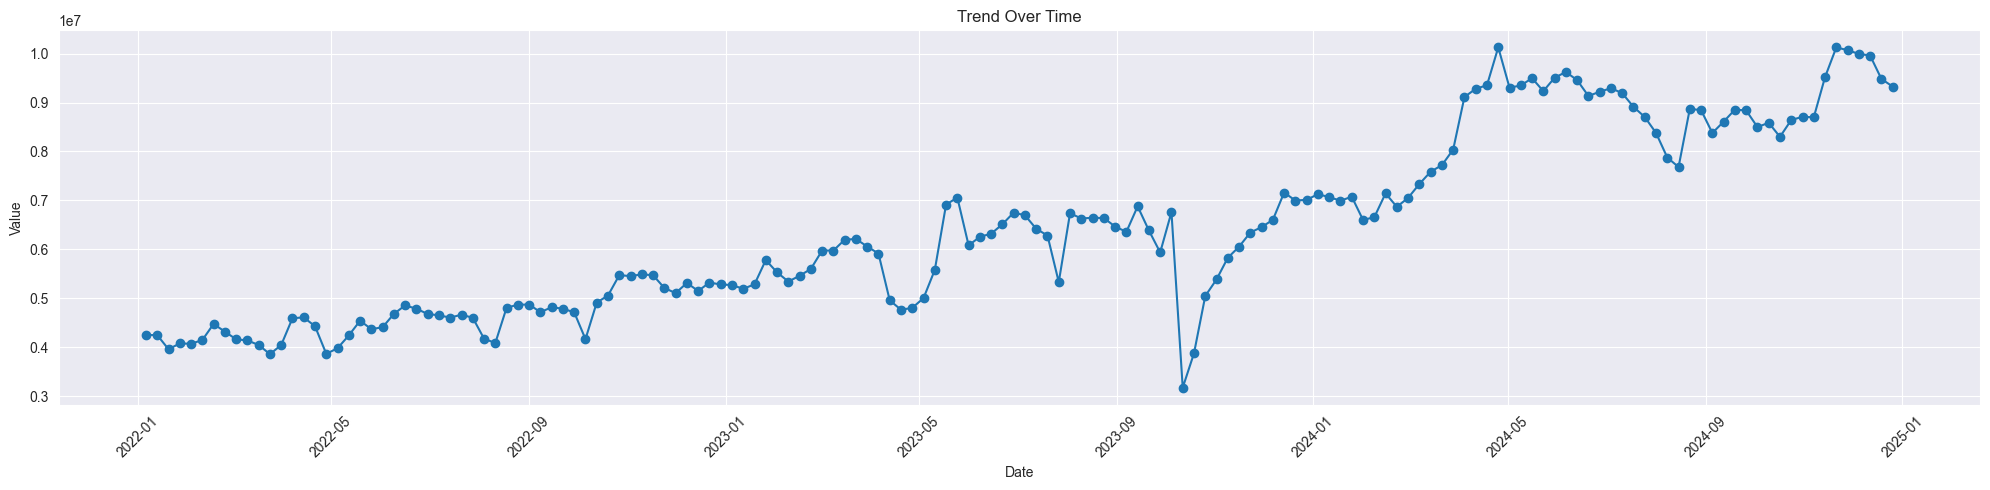

In [6]:
plt.figure(figsize=(20, 5))  # Optional: set figure size
plt.plot(df_grouped_by_date_sum_streams['Date'], df_grouped_by_date_sum_streams['streams'], marker='o', linestyle='-')
# 4. Labeling the chart
plt.title('Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
# 5. Format the dates on the x-axis (optional; helps if you have many dates)
plt.xticks(rotation=45)
# 6. Show the plot
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()

### Trend per month

In [188]:
df_grouped_by_month_sum_streams = df
df_grouped_by_month_sum_streams["YearMonth"] = df_grouped_by_month_sum_streams["Date"].dt.to_period("M")
df_grouped_by_month_sum_streams = df.groupby(["YearMonth"], as_index=False).sum("Value")
plt.figure(figsize=(20, 5))  # Optional: set figure size
plt.plot(df_grouped_by_month_sum_streams['YearMonth'].dt.to_timestamp(), df_grouped_by_month_sum_streams['streams'], marker='o', linestyle='-')
# 4. Labeling the chart
plt.title('Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
# 5. Format the dates on the x-axis (optional; helps if you have many dates)
plt.xticks(rotation=45)
# 6. Show the plot
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()

<IPython.core.display.Javascript object>

### Trend By Artist Type V1

In [31]:
df_grouped_by_date_and_artist_type_sum_streams = df.groupby(['Date', 'artist_type'], as_index=False)["streams"].sum()
df_grouped_by_date_and_artist_type_sum_streams

,Date,artist_type,streams
0,2022-01-06,International,1671596
1,2022-01-06,Israeli,2576761
2,2022-01-13,International,1707019
3,2022-01-13,Israeli,2537762
4,2022-01-20,International,1641539
...,...,...,...
307,2024-12-12,Israeli,8445110
308,2024-12-19,International,1422203
309,2024-12-19,Israeli,8060535
310,2024-12-26,International,1459965


In [32]:
df_israeli = df_grouped_by_date_and_artist_type_sum_streams[df_grouped_by_date_and_artist_type_sum_streams['artist_type']=='Israeli']
df_israeli

,Date,artist_type,streams
1,2022-01-06,Israeli,2576761
3,2022-01-13,Israeli,2537762
5,2022-01-20,Israeli,2314823
7,2022-01-27,Israeli,2472136
9,2022-02-03,Israeli,2411768
...,...,...,...
303,2024-11-28,Israeli,8199803
305,2024-12-05,Israeli,8258353
307,2024-12-12,Israeli,8445110
309,2024-12-19,Israeli,8060535


In [33]:
df_international = df_grouped_by_date_and_artist_type_sum_streams[df_grouped_by_date_and_artist_type_sum_streams['artist_type']=='International']
df_international

,Date,artist_type,streams
0,2022-01-06,International,1671596
2,2022-01-13,International,1707019
4,2022-01-20,International,1641539
6,2022-01-27,International,1602750
8,2022-02-03,International,1656722
...,...,...,...
302,2024-11-28,International,1869753
304,2024-12-05,International,1736403
306,2024-12-12,International,1514544
308,2024-12-19,International,1422203


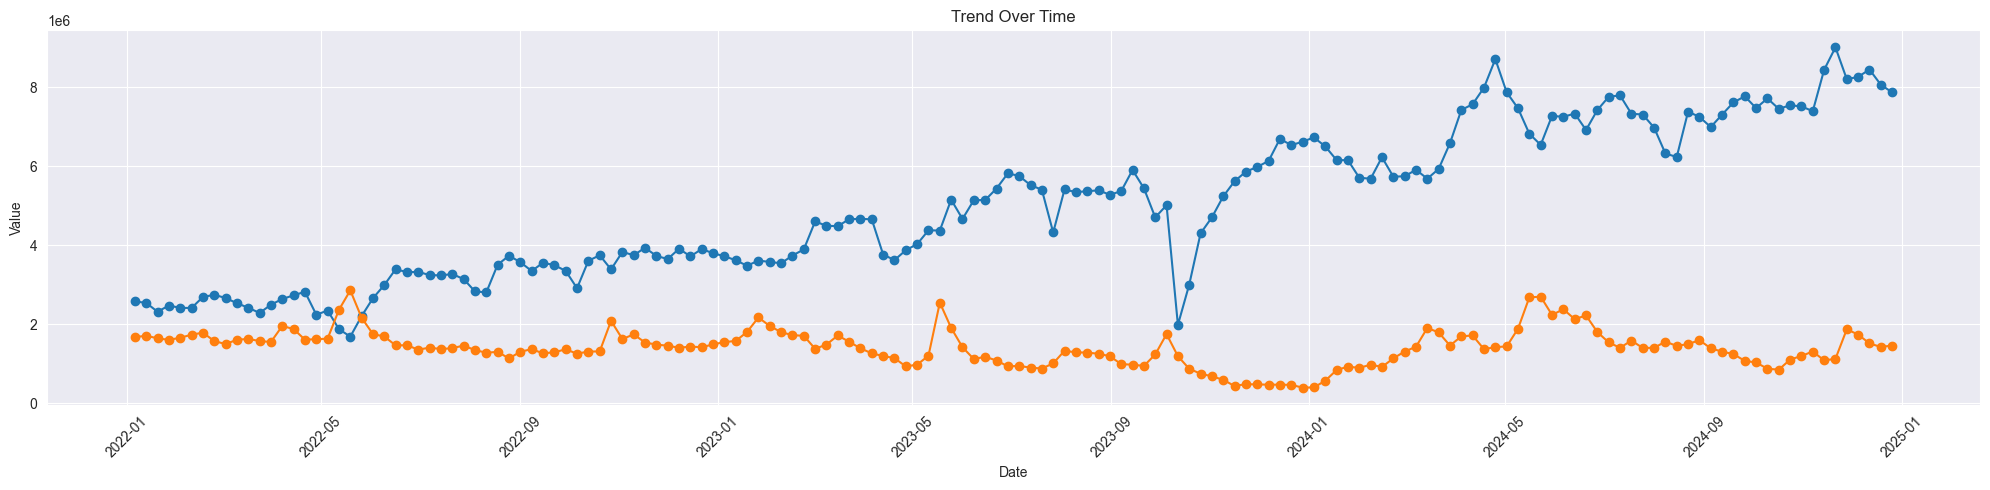

In [34]:
plt.figure(figsize=(20, 5))  # Optional: set figure size
plt.plot(df_israeli['Date'], df_israeli['streams'], marker='o', linestyle='-',)
plt.plot(df_international['Date'], df_international['streams'], marker='o', linestyle='-')
# 4. Labeling the chart
plt.title('Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
# 5. Format the dates on the x-axis (optional; helps if you have many dates)
plt.xticks(rotation=45)
# 6. Show the plot
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()

### Tend by generes

In [69]:
df_grouped_by_date_and_artist_genre_sum_streams = df.explode('artist_genres').groupby(['Date', 'artist_genres'], as_index=False)["streams"].sum()
df_grouped_by_date_and_artist_genre_sum_streams

,Date,artist_genres,streams
0,2022-01-06,afro r&b,108187
1,2022-01-06,afrobeats,108187
2,2022-01-06,alt z,103094
3,2022-01-06,australian hip hop,134607
4,2022-01-06,british soul,106836
...,...,...,...
3908,2024-12-26,israeli trap,106315
3909,2024-12-26,k-pop,271610
3910,2024-12-26,mizrahi,2782669
3911,2024-12-26,pop,710905


In [71]:
pivoted = df_grouped_by_date_and_artist_genre_sum_streams.pivot(index='Date', columns='artist_genres', values='streams').fillna(0)

In [ ]:
pivoted.plot(kind='bar', figsize=(12,6))
plt.title('Streams Over Time by Genre')
plt.xlabel('Date')
plt.ylabel('Number of Streams')
plt.legend(title='Genre')
plt.show()

In [ ]:
df

In [76]:
df.explode('artist_genres').groupby(['artist_genres'], as_index=False)["streams"].sum()

,artist_genres,streams
0,afro r&b,1459188
1,afrobeats,3030473
2,afrofuturism,955413
3,alt z,6185729
4,alternative hip hop,1055391
...,...,...
117,uk pop,11453675
118,urban contemporary,150914
119,urbano latino,2603045
120,viral pop,1685004


### Find Outliers

In [187]:

# Compute mean and std dev for each day of week
grouped_mean = df_grouped_by_date_sum_streams.groupby("Date")["streams"].transform("mean")
grouped_std = df_grouped_by_date_sum_streams.groupby("Date")["streams"].transform("std")

df_grouped_by_date_sum_streams["z_score"] = (df_grouped_by_date_sum_streams["streams"] - grouped_mean) / grouped_std

# Threshold for outliers (e.g. abs(z) > 3)
df_grouped_by_date_sum_streams["is_outlier_z"] = np.abs(df_grouped_by_date_sum_streams["z_score"]) > 3

# Filter outliers
outliers_z = df_grouped_by_date_sum_streams[df_grouped_by_date_sum_streams["is_outlier_z"]]
print(outliers_z[["Date", "streams", "z_score"]])

df_grouped_by_date_sum_streams["is_outlier"] = df_grouped_by_date_sum_streams["is_outlier_z"]  # or from the IQR approach

plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df_grouped_by_date_sum_streams, 
    x="Date", 
    y="streams", 
    hue="is_outlier",   # Color by whether it's an outlier
    palette={True: "red", False: "blue"}
)
plt.title("Streams by Day of Week (Outliers in Red)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Empty DataFrame
Columns: [Date, streams, z_score]
Index: []


<IPython.core.display.Javascript object>

In [185]:
bruno_df = df[df['artist_names'] == 'Bruno Mars']
plt.figure(figsize=(20, 5))  # Optional: set figure size
plt.plot(bruno_df['Date'], bruno_df['streams'], marker='o', linestyle='-')
# 4. Labeling the chart
plt.title('Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
# 5. Format the dates on the x-axis (optional; helps if you have many dates)
plt.xticks(rotation=45)
# 6. Show the plot
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()

<IPython.core.display.Javascript object>

In [152]:
bruno_df = df[df['artist_names'].str.contains('Imagine Dragons', case=False)]
plt.figure(figsize=(20, 5))  # Optional: set figure size
plt.plot(bruno_df['Date'], bruno_df['streams'], marker='o', linestyle='-')
# 4. Labeling the chart
plt.title('Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
# 5. Format the dates on the x-axis (optional; helps if you have many dates)
plt.xticks(rotation=45)
# 6. Show the plot
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()

<IPython.core.display.Javascript object>

In [153]:
bruno_df = df[df['artist_names'].str.contains('STILLA', case=False)]
plt.figure(figsize=(20, 5))  # Optional: set figure size
plt.plot(bruno_df['Date'], bruno_df['streams'], marker='o', linestyle='-')
# 4. Labeling the chart
plt.title('Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
# 5. Format the dates on the x-axis (optional; helps if you have many dates)
plt.xticks(rotation=45)
# 6. Show the plot
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()

<IPython.core.display.Javascript object>

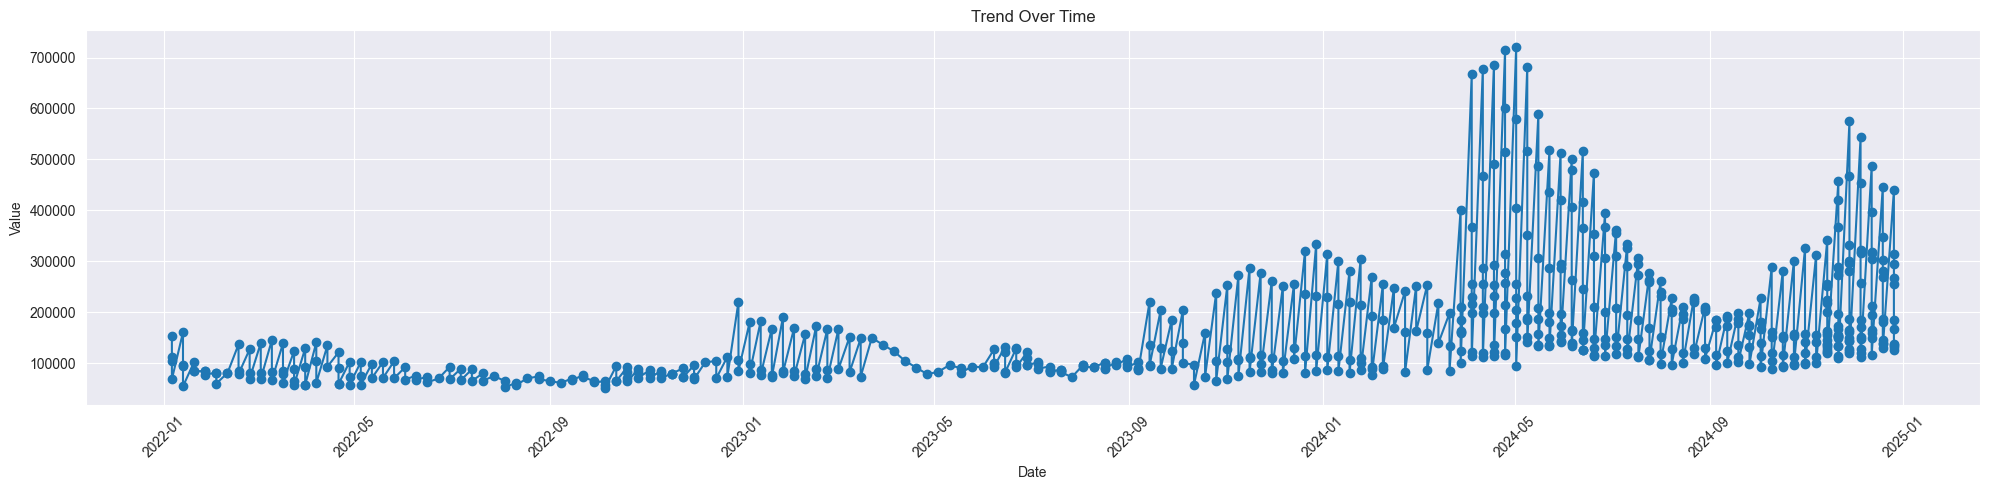

In [35]:
bruno_df = df[df['artist_names'].str.contains('Omer Adam', case=False)]
plt.figure(figsize=(20, 5))  # Optional: set figure size
plt.plot(bruno_df['Date'], bruno_df['streams'], marker='o', linestyle='-')
# 4. Labeling the chart
plt.title('Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
# 5. Format the dates on the x-axis (optional; helps if you have many dates)
plt.xticks(rotation=45)
# 6. Show the plot
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()